/tmp/ipykernel_674047/1625800093.py:6: DtypeWarning: Columns (63,71) have mixed types. Specify dtype option on import or set low_memory=False.
  wind_farm_data = pd.read_csv(file_path)
35972it [00:53, 678.47it/s] 


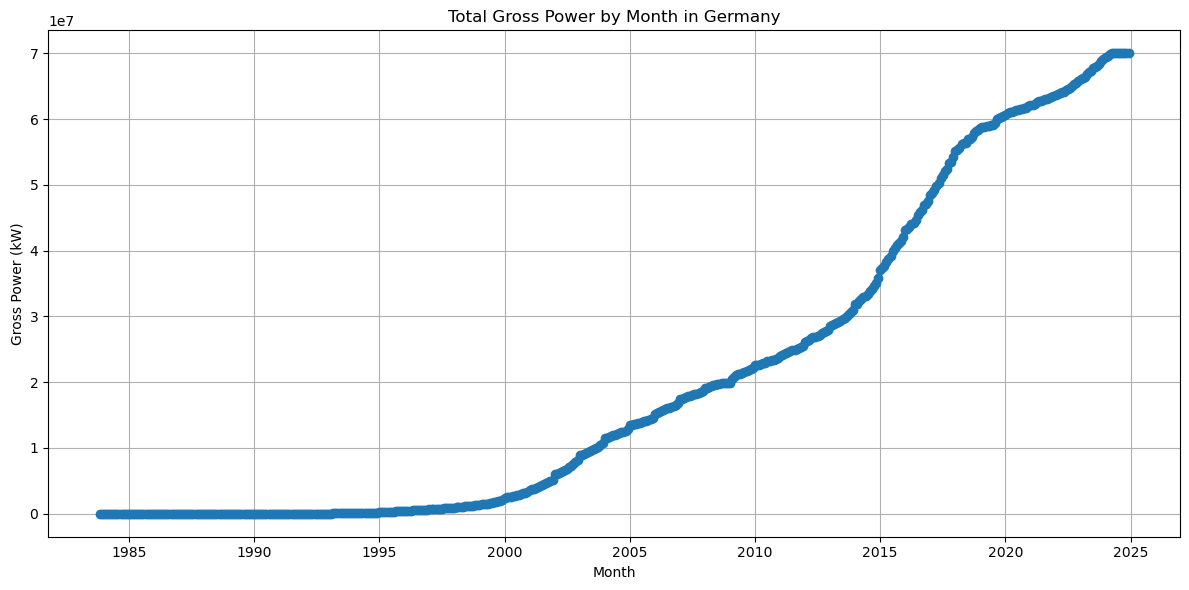

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
# Load the data
file_path = 'germany-wind-farm-info.csv'
wind_farm_data = pd.read_csv(file_path)

# Extract relevant columns
relevant_columns = ['Commissioning Date', 'DatumEndgueltigeStilllegung', 'Gross Power (kW)']
wind_farm_data = wind_farm_data[relevant_columns]

# Convert date columns to datetime
wind_farm_data['Commissioning Date'] = pd.to_datetime(wind_farm_data['Commissioning Date'], errors='coerce')
wind_farm_data['DatumEndgueltigeStilllegung'] = pd.to_datetime(wind_farm_data['DatumEndgueltigeStilllegung'], errors='coerce')

# Fill NaN decommissioning dates with a future date for those still operational
wind_farm_data['DatumEndgueltigeStilllegung'] = wind_farm_data['DatumEndgueltigeStilllegung'].fillna(pd.Timestamp('2024-12-31'))

# Function to generate a DataFrame of monthly power for each turbine
def generate_monthly_power(df):
    monthly_power = []
    for _, row in tqdm(df.iterrows()):
        start_date = row['Commissioning Date']
        end_date = row['DatumEndgueltigeStilllegung']
        power = row['Gross Power (kW)']
        
        if pd.isna(start_date) or pd.isna(power):
            continue
        
        # Generate a range of months between the start and end dates
        month_range = pd.date_range(start=start_date, end=end_date, freq='MS')
        for month in month_range:
            monthly_power.append({
                'Month': month,
                'Gross Power (kW)': power
            })
    
    return pd.DataFrame(monthly_power)

# Generate the monthly power DataFrame
monthly_power_data = generate_monthly_power(wind_farm_data)

# Aggregate the total gross power by month
total_monthly_power = monthly_power_data.groupby('Month').sum().reset_index()

# Plot the total gross power by month
plt.figure(figsize=(12, 6))
plt.plot(total_monthly_power['Month'], total_monthly_power['Gross Power (kW)'], marker='o', linestyle='-')
plt.title('Total Gross Power by Month in Germany')
plt.xlabel('Month')
plt.ylabel('Gross Power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd

# Load the data
file_path = 'germany-wind-farm-info.csv'
wind_farm_data = pd.read_csv(file_path)

# Extract relevant columns including the location
relevant_columns = ['Commissioning Date', 'DatumEndgueltigeStilllegung', 'Gross Power (kW)', 'Location']
wind_farm_data = wind_farm_data[relevant_columns]

# Convert date columns to datetime
wind_farm_data['Commissioning Date'] = pd.to_datetime(wind_farm_data['Commissioning Date'], errors='coerce')
wind_farm_data['DatumEndgueltigeStilllegung'] = pd.to_datetime(wind_farm_data['DatumEndgueltigeStilllegung'], errors='coerce')

# Fill NaN decommissioning dates with a future date for those still operational
wind_farm_data['DatumEndgueltigeStilllegung'] = wind_farm_data['DatumEndgueltigeStilllegung'].fillna(pd.Timestamp('2024-12-31'))

# Separate onshore and offshore farms
onshore_farms = wind_farm_data[wind_farm_data['Location'] == 888]
offshore_farms = wind_farm_data[wind_farm_data['Location'] == 889]

# Function to generate a DataFrame of monthly power for each turbine
def generate_monthly_power(df):
    monthly_power = []
    for _, row in tqdm(df.iterrows()):
        start_date = row['Commissioning Date']
        end_date = row['DatumEndgueltigeStilllegung']
        power = row['Gross Power (kW)']
        
        if pd.isna(start_date) or pd.isna(power):
            continue
        
        # Generate a range of months between the start and end dates
        month_range = pd.date_range(start=start_date, end=end_date, freq='MS')
        for month in month_range:
            monthly_power.append({
                'Month': month,
                'Gross Power (kW)': power
            })
    
    return pd.DataFrame(monthly_power)

# Generate monthly power DataFrame for onshore farms
onshore_monthly_power_data = generate_monthly_power(onshore_farms)

# Generate monthly power DataFrame for offshore farms
offshore_monthly_power_data = generate_monthly_power(offshore_farms)

# Aggregate the total gross power by month for onshore and offshore farms
total_onshore_monthly_power = onshore_monthly_power_data.groupby('Month').sum().reset_index()
total_offshore_monthly_power = offshore_monthly_power_data.groupby('Month').sum().reset_index()

# Generate the monthly power DataFrame for all farms
monthly_power_data = generate_monthly_power(wind_farm_data)
total_monthly_power = monthly_power_data.groupby('Month').sum().reset_index()

# Merge data into a single DataFrame
merged_data = total_monthly_power.merge(total_onshore_monthly_power, on='Month', how='outer', suffixes=('_all', '_onshore'))
merged_data = merged_data.merge(total_offshore_monthly_power, on='Month', how='outer')
merged_data.rename(columns={'Gross Power (kW)': 'Gross Power (kW)_offshore'}, inplace=True)

# Fill NaN values with 0
merged_data.fillna(0, inplace=True)

# Save the merged data to CSV
output_path = 'monthly_power_data.csv'
merged_data.to_csv(output_path, index=False)

print(f"Data has been written to {output_path}")


/tmp/ipykernel_674047/2379016359.py:5: DtypeWarning: Columns (63,71) have mixed types. Specify dtype option on import or set low_memory=False.
  wind_farm_data = pd.read_csv(file_path)
34187it [00:48, 702.15it/s] 
1784it [00:01, 1471.02it/s]
35972it [00:47, 761.43it/s] 


Data has been written to monthly_power_data.csv


In [9]:
onshore_monthly_power_data.columns

RangeIndex(start=0, stop=0, step=1)